# Image Classification using sequential model

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD
from keras.layers.normalization import BatchNormalization

# Import the backend
from keras import backend as K

import os
# print(os.listdir("fruitsdata"))
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Training Set

In [ ]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("drive/MyDrive/Intuitive/dataset/training/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Streaming output truncated to the last 5000 lines.
drive/MyDrive/Intuitive/dataset/training/birds/4414.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/29715.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/8479.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/791.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/10734.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/9265.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/30226.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/13686.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/30297.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/32678.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/27642.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/25507.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/21198.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/14823.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/16301.jpeg
drive/MyDrive/Intuitive/dataset/training/birds/31667.jpeg
drive/MyDrive/Intuitive/da

In [ ]:
label_to_id = {v:i for i, v in enumerate(np.unique(train_labels))}
id_to_label = {v:k for k, v in label_to_id.items()}

In [ ]:
train_label_ids = np.array([label_to_id[x] for x in train_labels])

In [ ]:
train_images.shape, train_label_ids.shape, train_labels.shape

((10878, 100, 100, 3), (10878,), (10878,))

### Test set images

In [ ]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("drive/MyDrive/Intuitive/dataset/test/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
test_label_ids = np.array([label_to_id[x] for x in test_labels])

In [ ]:
test_images.shape, test_label_ids.shape

((334, 100, 100, 3), (334,))

### Data Splitting to train and test

In [ ]:
Xtrain, Xtest = train_images, test_images
Ytrain, Ytest = train_label_ids, test_label_ids

Xtrain = Xtrain/255
Xtest = Xtest/255

#Make a flattened version for some of our models
Xflat_train = Xtrain.reshape(Xtrain.shape[0], 100*100*3)
Xflat_test = Xtest.reshape(Xtest.shape[0], 100*100*3)

Ytrain = keras.utils.to_categorical(Ytrain, 2)
Ytest = keras.utils.to_categorical(Ytest, 2)

print('Original Sizes:', Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print('Flattened:', Xflat_train.shape, Xflat_test.shape)

Original Sizes: (10878, 100, 100, 3) (334, 100, 100, 3) (10878, 2) (334, 2)
Flattened: (10878, 30000) (334, 30000)


In [ ]:
print(Xtrain[1].shape)

(100, 100, 3)


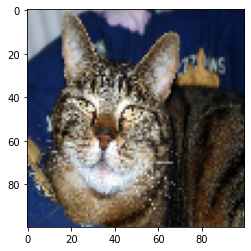

In [ ]:
plt.imshow(Xtrain[1])

### Executing the model

In [ ]:
first_model = Sequential()
first_model.add(Dense(100, activation='relu', input_shape=(Xflat_train.shape[1],)))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.05))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.05))
first_model.add(Dense(2, activation='softmax'))

first_model.summary()

first_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_model = first_model.fit(Xflat_train, Ytrain,
                          batch_size=128,
                          epochs=100,
                          verbose=1,
                          validation_data=(Xflat_test, Ytest))
score = first_model.evaluate(Xflat_test, Ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               3000100   
_________________________________________________________________
dense_13 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

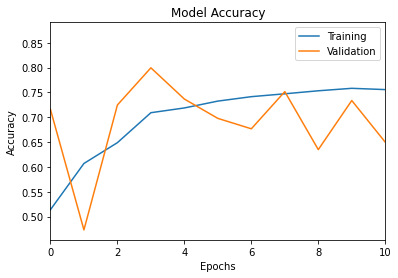

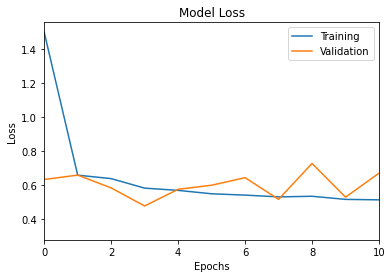

In [ ]:
# Accuracy
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim((0, 10))
plt.legend(['Training', 'Validation'])
plt.show()

# Loss
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((0, 10))
plt.legend(['Training', 'Validation'])
plt.show()